# Data Cleaning

Analizing the database of The Movies Dataset: [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [6]:
# https://www.kaggle.com/milankalkenings/comprehensive-tutorial-data-cleaning
def nullscan(df_check, save=False):
 
    df_nulls = df_check.isna()

    nulls_per_col = df_nulls.sum(axis=0)
    
    nulls_per_col /= len(df_check.index)

    with plt.style.context('dark_background'):
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))

        vir = matplotlib.cm.get_cmap('viridis')
        colormap = matplotlib.colors.ListedColormap([vir(0), 'darkorange'])
        sns.heatmap(df_check.isnull(), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
    
        nulls_per_col.plot(kind='bar', color='darkorange', x=nulls_per_col.values, 
                           y=nulls_per_col.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
        
        ax2.set_ylim((0,1))

        labels=df_check.columns
        ticks = np.arange(0.5, len(labels))
        ax2.xaxis.set(ticks=ticks, ticklabels=labels)
    
        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_color('black')
        

        na_ticks = ticks[(nulls_per_col > 0) & (nulls_per_col < 0.05)]
        if (len(na_ticks) > 0):
            ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
                     label='Very few missing values')
    
        fig.suptitle('Null Value Rate per Column', fontsize=30, y=1.05)
        ax2.legend()
        fig.tight_layout() 
        if(save):
            plt.savefig('nullscan.png')
        plt.show()

In [7]:
def print_missing_val(database):
    missing_val_count_by_column = (database.isnull().sum())
    print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

## Cleaning credits.csv

In [8]:
path = '1-Source/'
credits_path = path + 'credits.csv'

credits = pd.read_csv(credits_path)

In [9]:
print(credits.shape)
credits[:5]

(45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [10]:
credits.dtypes

cast    object
crew    object
id       int64
dtype: object

#### Handling Missing Values

In [11]:
print_missing_val(credits)

Series([], dtype: int64)


#### Cool, credit has no null credits.csv 

In [12]:
credits.to_csv("2-Data/credits.csv")

## Cleaning keywords.csv

In [13]:
keywords_path = path + 'keywords.csv'
keywords = pd.read_csv(keywords_path)

print(keywords.shape)
keywords[:5]

(46419, 2)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [14]:
print_missing_val(keywords)

Series([], dtype: int64)


#### Cool, credit has no null keywords.csv 

In [15]:
keywords.to_csv("2-Data/keywords.csv")

## Cleaning links.csv

In [16]:
links_path = path + 'links.csv'

links = pd.read_csv(links_path)

print(links.shape)
links[:5]

(45843, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [17]:
print_missing_val(links)

tmdbId    219
dtype: int64


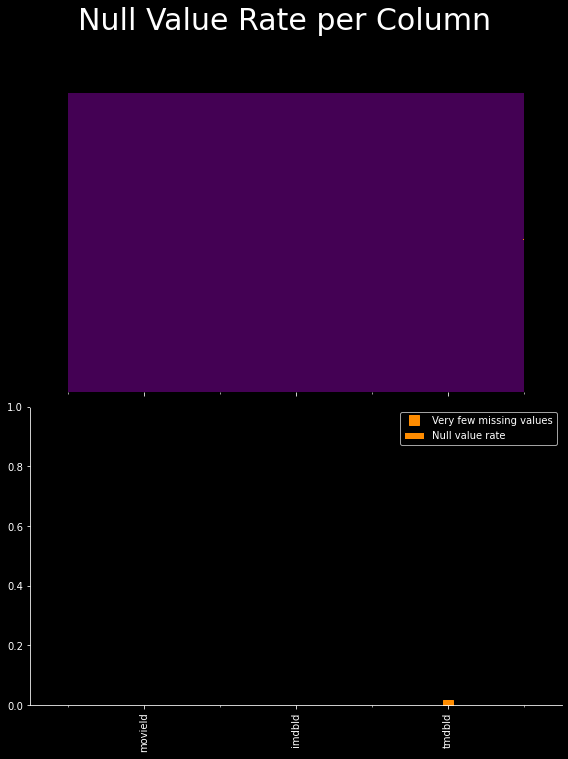

In [18]:
nullscan(links)

#### The number of missing values is very small, for this reason I decided to delete the rows with null values

In [19]:
links.dropna(subset=['tmdbId'], inplace=True)

In [20]:
print_missing_val(links)

Series([], dtype: int64)


In [21]:
links.to_csv("2-Data/links.csv")

## Cleaning links_small_path.csv

In [22]:
links_small_path = path + 'links_small.csv'
links_small = pd.read_csv(links_small_path)

print(links_small.shape)
links_small[:5]

(9125, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [23]:
print_missing_val(links_small)

tmdbId    13
dtype: int64


In [24]:
links_small.dropna(subset=['tmdbId'], inplace=True)

#### I deleted the rows with null values

In [25]:
print_missing_val(links_small)

Series([], dtype: int64)


In [26]:
links_small.to_csv("2-Data/links_small.csv")

## Cleaning movies_metadata.csv

In [27]:
movies_metadata_path = path + 'movies_metadata.csv'
movies_metadata = pd.read_csv(movies_metadata_path, low_memory=False)

print(movies_metadata.shape)
movies_metadata[:5]

(45466, 24)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [28]:
movies_metadata.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
adult,45466,5,False,45454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
belongs_to_collection,4494,1698,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,45466,1226,0,36573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,45466,4069,"[{'id': 18, 'name': 'Drama'}]",5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,7782,7673,http://www.georgecarlin.com,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,45466,45436,141971,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_id,45449,45417,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,45455,92,en,32269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,45466,43373,Hamlet,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,44512,44307,No overview found.,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print_missing_val(movies_metadata)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
revenue                      6
spoken_languages             6
title                        6
video                        6
vote_average                 6
vote_count                   6
popularity                   5
production_countries         3
production_companies         3
dtype: int64


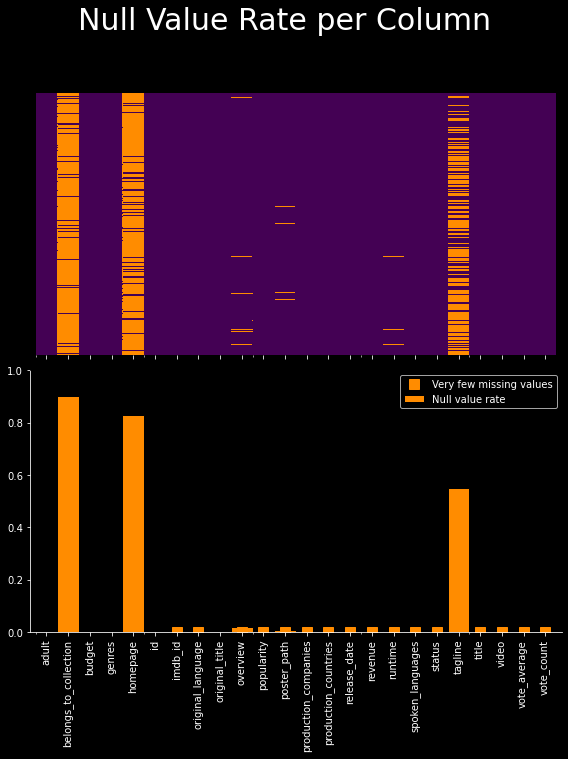

In [30]:
nullscan(movies_metadata)

#### At first for the analysis I'm going to do I don't need to use belongs_to_collection, homepage , tagline and because they are almost completely empty I'll delete these columns

In [31]:
movies_metadata.drop(['belongs_to_collection', 'homepage' , 'tagline'], axis='columns', inplace=True)

In [32]:
print_missing_val(movies_metadata)

overview                954
poster_path             386
runtime                 263
release_date             87
status                   87
imdb_id                  17
original_language        11
revenue                   6
spoken_languages          6
title                     6
video                     6
vote_average              6
vote_count                6
popularity                5
production_companies      3
production_countries      3
dtype: int64


#### The values are null not too low so I'm going to delete the rows

In [33]:
movies_metadata.dropna(subset=
                       ['overview','poster_path', 'runtime', 'release_date', 'status', 'imdb_id', 'original_language', 'revenue', 
                        'spoken_languages', 'title', 'video', 'vote_average', 'vote_count', 'popularity', 'production_companies','production_countries' ], inplace=True)

In [34]:
print_missing_val(movies_metadata)

Series([], dtype: int64)


In [45]:
movies_metadata['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [36]:
movies_metadata.to_csv("2-Data/movies_metadata.csv")

## Cleaning ratings_small.csv

In [37]:
ratings_small_path = path + 'ratings_small.csv'
ratings_small = pd.read_csv(ratings_small_path)

print(ratings_small.shape)
ratings_small[:5]

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
print_missing_val(ratings_small)

Series([], dtype: int64)


In [39]:
ratings_small.to_csv("2-Data/ratings_small.csv")

## Cleaning ratings.csv

In [40]:
ratings_path = path + 'ratings.csv'
ratings = pd.read_csv(ratings_path)

print(ratings.shape)
ratings[:5]

(26024289, 4)


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [41]:
print_missing_val(ratings)

Series([], dtype: int64)


In [42]:
ratings.to_csv("2-Data/ratings.csv")